In [40]:
import numpy as np
import pandas as pd
import requests
import pymatgen.core as pmg
import warnings
# !pip install pip install mp-api
# !pip install pymatgen

In [4]:

MP_API_KEY = "XizEPyfLpTFxjMrtCpObYPshzopUe5aG"

In [5]:
response = requests.get("https://api.materialsproject.org/materials/mp-149/?fields=material_id%2Cstructure&all_fields=false", 
                        headers={"X-API-KEY": MP_API_KEY})

print(response.text)

{"detail":"Not Found"}


In [6]:
#helper fn to shorten lists
def shortlist(long_list, n=5):
    print("First {} of {} items:".format(min(n, 5), len(long_list)))
    for item in long_list[0:n]:
        print(item)

In [50]:
from mp_api.client import MPRester
import json
with MPRester("XizEPyfLpTFxjMrtCpObYPshzopUe5aG") as mpr:
    docs = mpr.summary.search(material_ids=["mp-149"])

docs[0]

C:\Users\yashb\AppData\Local\Temp\ipykernel_11012\3305843628.py:4: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  docs = mpr.summary.search(material_ids=["mp-149"])


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

MPDataDoc<SummaryDoc>(
builder_meta=EmmetMeta(emmet_version='0.72.20', pymatgen_version='2023.11.12', pull_request=990, database_version='2023.11.1', build_date=datetime.datetime(2023, 11, 22, 19, 46, 57, 168000), license='BY-C'),
nsites=2,
elements=[Element Si],
nelements=1,
composition=Composition('Si2'),
composition_reduced=Composition('Si1'),
formula_pretty='Si',
formula_anonymous='A',
chemsys='Si',
volume=40.32952684741405,
density=2.312800253345134,
density_atomic=20.164763423707026,
symmetry=SymmetryData(crystal_system=<CrystalSystem.cubic: 'Cubic'>, symbol='Fd-3m', number=227, point_group='m-3m', symprec=0.1, version='2.0.2'),
property_name='summary',
material_id=MPID(mp-149),
deprecated=False,
deprecation_reasons=None,
last_updated=datetime.datetime(2023, 11, 22, 19, 46, 57, 169000),
origins=[PropertyOrigin(name='structure', task_id=MPID(mp-1947498), last_updated=datetime.datetime(2021, 3, 5, 11, 47, 3, 84000)), PropertyOrigin(name='energy', task_id=MPID(mp-1947498), last_upda

In [14]:
example_doc = docs[0]

mpid = example_doc.material_id
formula = example_doc.formula_pretty
formula, mpid

('Si', MPID(mp-149))

In [65]:
#list of available fields
list_of_available_fields = mpr.summary.available_fields
temp = list_of_available_fields[0]
list_of_available_fields[0] = list_of_available_fields[14]
list_of_available_fields[14] = temp
list_of_available_fields


C:\Users\yashb\AppData\Local\Temp\ipykernel_11012\285861960.py:2: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  list_of_available_fields = mpr.summary.available_fields


['material_id',
 'nsites',
 'elements',
 'nelements',
 'composition',
 'composition_reduced',
 'formula_pretty',
 'formula_anonymous',
 'chemsys',
 'volume',
 'density',
 'density_atomic',
 'symmetry',
 'property_name',
 'builder_meta',
 'deprecated',
 'deprecation_reasons',
 'last_updated',
 'origins',
 'warnings',
 'structure',
 'task_ids',
 'uncorrected_energy_per_atom',
 'energy_per_atom',
 'formation_energy_per_atom',
 'energy_above_hull',
 'is_stable',
 'equilibrium_reaction_energy_per_atom',
 'decomposes_to',
 'xas',
 'grain_boundaries',
 'band_gap',
 'cbm',
 'vbm',
 'efermi',
 'is_gap_direct',
 'is_metal',
 'es_source_calc_id',
 'bandstructure',
 'dos',
 'dos_energy_up',
 'dos_energy_down',
 'is_magnetic',
 'ordering',
 'total_magnetization',
 'total_magnetization_normalized_vol',
 'total_magnetization_normalized_formula_units',
 'num_magnetic_sites',
 'num_unique_magnetic_sites',
 'types_of_magnetic_species',
 'bulk_modulus',
 'shear_modulus',
 'universal_anisotropy',
 'homoge

In [16]:
with MPRester(MP_API_KEY) as mpr:
    print(mpr.thermo.available_fields)

['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'thermo_type', 'thermo_id', 'uncorrected_energy_per_atom', 'energy_per_atom', 'energy_uncertainy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'decomposition_enthalpy', 'decomposition_enthalpy_decomposes_to', 'energy_type', 'entry_types', 'entries']


C:\Users\yashb\AppData\Local\Temp\ipykernel_11012\1355330979.py:2: DeprecationWarning: Accessing thermo data through MPRester.thermo is deprecated. Please use MPRester.materials.thermo instead.
  print(mpr.thermo.available_fields)


In [17]:
from pymatgen.electronic_structure.plotter import BSPlotter
# Helpful function for plotting a bandstructure. 
def plot_bandstructure(bs):
    BSPlotter(bs).get_plot().show() 

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

AttributeError: 'Axes' object has no attribute 'show'

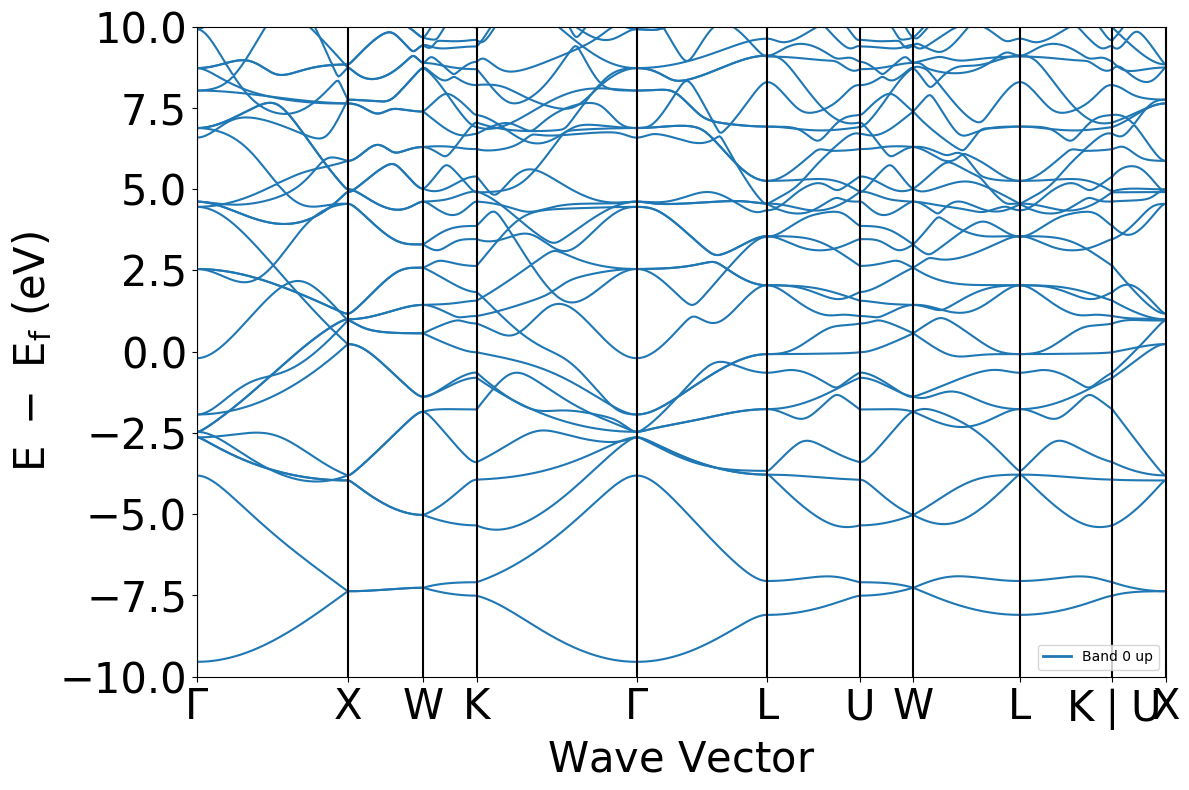

In [18]:
# Use the MPRester's get_bandstructure_by_material_id method to 
# get a bandstructure from the MP Database and plot it using the
# plot_bandstructure functin defined above.
with MPRester(MP_API_KEY) as mpr:
    bs = mpr.get_bandstructure_by_material_id("mp-1234")

plot_bandstructure(bs) 

Pymatgen


In [ ]:
# Integrated symmetry analysis tools from spglib
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

si = pmg.Element("Si")
si.atomic_mass  # 28.0855
print(si.melting_point)

comp = pmg.Composition("Fe2O3")
comp.weight 
# Note that Composition conveniently allows strings to be treated just like an Element object.
comp["Fe"]  
comp.get_atomic_fraction("Fe")  # 0.4
lattice = pmg.Lattice.cubic(4.2)

structure = pmg.Structure.from_str(open("1.cif").read(), fmt="cif")
structure

1687.0 K


Structure Summary
Lattice
    abc : 4.48903651 4.48903651 4.48903651
 angles : 59.99999999999999 59.99999999999999 59.999999999999986
 volume : 63.96529615190417
      A : 3.887619656175837 0.0 2.2445182550000005
      B : 1.2958732187252793 3.665282962074732 2.2445182550000005
      C : 0.0 0.0 4.48903651
    pbc : True True True
PeriodicSite: Ti1 (Ti) (0.0, 0.0, 0.0) [0.0, 0.0, 0.0]
PeriodicSite: Ti2 (Ti) (3.888, 2.749, 6.734) [0.75, 0.75, 0.75]
PeriodicSite: Mn3 (Mn) (2.592, 1.833, 4.489) [0.5, 0.5, 0.5]
PeriodicSite: In4 (In) (1.296, 0.9163, 2.245) [0.25, 0.25, 0.25]

: 

______________________________


In [62]:


with MPRester(MP_API_KEY) as mpr:
  # Search by material ID (replace with IDs of your crystals)
  material_ids = [f"mp-{i}" for i in range(10000, 20000)]
  docs = mpr.materials.summary.search(material_ids=material_ids) 

df = pd.DataFrame(columns=list_of_available_fields)


# Access information about each crystal
rctr = 0
for doc in docs:
    warnings.filterwarnings("ignore", category=FutureWarning)
    df.loc[rctr] = {'material_id':doc.material_id,  'builder_meta':doc.builder_meta,  'nsites':doc.nsites,  'elements':doc.elements,  'nelements':doc.nelements,  
                    'composition':doc.composition,  'composition_reduced':doc.composition_reduced,  'formula_pretty':doc.formula_pretty,  
                    'formula_anonymous':doc.formula_anonymous,  'chemsys':doc.chemsys,  'volume':doc.volume,  'density':doc.density,  
                    'density_atomic':doc.density_atomic,  'symmetry':doc.symmetry,  'property_name':doc.property_name,    
                    'deprecated':doc.deprecated,  'deprecation_reasons':doc.deprecation_reasons,  'last_updated':doc.last_updated,  'origins':doc.origins,  
                    'warnings':doc.warnings,  'structure':doc.structure,  'task_ids':doc.task_ids,  'uncorrected_energy_per_atom':doc.uncorrected_energy_per_atom,  
                    'energy_per_atom':doc.energy_per_atom,  'formation_energy_per_atom':doc.formation_energy_per_atom,  'energy_above_hull':doc.energy_above_hull,  
                    'is_stable':doc.is_stable,  'equilibrium_reaction_energy_per_atom':doc.equilibrium_reaction_energy_per_atom,  'decomposes_to':doc.decomposes_to,  
                    'xas':doc.xas,  'grain_boundaries':doc.grain_boundaries,  'band_gap':doc.band_gap,  'cbm':doc.cbm,  'vbm':doc.vbm,  'efermi':doc.efermi,  
                    'is_gap_direct':doc.is_gap_direct,  'is_metal':doc.is_metal,  'es_source_calc_id':doc.es_source_calc_id,  'bandstructure':doc.bandstructure,  
                    'dos':doc.dos,  'dos_energy_up':doc.dos_energy_up,  'dos_energy_down':doc.dos_energy_down,  'is_magnetic':doc.is_magnetic,  'ordering':doc.ordering,  
                    'total_magnetization':doc.total_magnetization,  'total_magnetization_normalized_vol':doc.total_magnetization_normalized_vol,  
                    'total_magnetization_normalized_formula_units':doc.total_magnetization_normalized_formula_units,  'num_magnetic_sites':doc.num_magnetic_sites,  
                    'num_unique_magnetic_sites':doc.num_unique_magnetic_sites,  'types_of_magnetic_species':doc.types_of_magnetic_species,  'bulk_modulus':doc.bulk_modulus,  
                    'shear_modulus':doc.shear_modulus,  'universal_anisotropy':doc.universal_anisotropy,  'homogeneous_poisson':doc.homogeneous_poisson,  'e_total':doc.e_total,  
                    'e_ionic':doc.e_ionic,  'e_electronic':doc.e_electronic,  'n':doc.n,  'e_ij_max':doc.e_ij_max,  
                    'weighted_surface_energy_EV_PER_ANG2':doc.weighted_surface_energy_EV_PER_ANG2,  'weighted_surface_energy':doc.weighted_surface_energy,  
                    'weighted_work_function':doc.weighted_work_function,  'surface_anisotropy':doc.surface_anisotropy,  'shape_factor':doc.shape_factor,  
                    'has_reconstructed':doc.has_reconstructed,  'possible_species':doc.possible_species,  'has_props':doc.has_props,  'theoretical':doc.theoretical,  
                    'database_IDs':doc.database_IDs,}


    rctr+=1

df




Retrieving SummaryDoc documents:   0%|          | 0/5102 [00:00<?, ?it/s]

,builder_meta,nsites,elements,nelements,composition,composition_reduced,formula_pretty,formula_anonymous,chemsys,volume,...,weighted_surface_energy_EV_PER_ANG2,weighted_surface_energy,weighted_work_function,surface_anisotropy,shape_factor,has_reconstructed,possible_species,has_props,theoretical,database_IDs
0,emmet_version='0.72.20' pymatgen_version='2023...,5,"[Ca, N, Tl]",3,"(Ca, Tl, N)","(Ca, Tl, N)",Ca3TlN,ABC3,Ca-N-Tl,121.568685,...,NaN,NaN,NaN,NaN,NaN,None,[],"{'materials': True, 'thermo': True, 'xas': Tru...",False,{'icsd': ['icsd-411448']}
1,emmet_version='0.72.20' pymatgen_version='2023...,16,"[Ba, Li, N, Re]",4,"(Ba, Li, Re, N)","(Ba, Li, Re, N)",Ba2LiReN4,ABC2D4,Ba-Li-N-Re,285.419358,...,NaN,NaN,NaN,NaN,NaN,None,"[Re7+, Li+, Ba2+, N3-]","{'materials': True, 'thermo': True, 'xas': Tru...",False,{'icsd': ['icsd-411453']}
2,emmet_version='0.72.20' pymatgen_version='2023...,36,"[Ca, P, Rh]",3,"(Ca, P, Rh)","(Ca, P, Rh)",Ca5P12Rh19,A5B12C19,Ca-P-Rh,550.561912,...,NaN,NaN,NaN,NaN,NaN,None,[],"{'materials': True, 'thermo': True, 'xas': Tru...",False,{'icsd': ['icsd-412128']}
3,emmet_version='0.72.20' pymatgen_version='2023...,10,"[Ba, Li, O, Os]",4,"(Ba, Li, Os, O)","(Ba, Li, Os, O)",Ba2LiOsO6,ABC2D6,Ba-Li-O-Os,138.316181,...,NaN,NaN,NaN,NaN,NaN,None,"[O2-, Ba2+, Li+, Os7+]","{'materials': True, 'thermo': True, 'xas': Tru...",False,{'icsd': ['icsd-412142']}
4,emmet_version='0.72.20' pymatgen_version='2023...,2,[Ag],1,(Ag),(Ag),Ag,A,Ag,34.772131,...,NaN,NaN,NaN,NaN,NaN,None,[],"{'materials': True, 'thermo': True, 'xas': Tru...",False,{'icsd': ['icsd-56269']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097,emmet_version='0.72.20' pymatgen_version='2023...,6,"[Ni, Sb]",2,"(Ni, Sb)","(Ni, Sb)",NiSb2,AB2,Ni-Sb,126.633005,...,NaN,NaN,NaN,NaN,NaN,None,"[Ni2+, Sb-]","{'materials': True, 'thermo': True, 'xas': Tru...",False,"{'icsd': ['icsd-646409', 'icsd-646414', 'icsd-..."
5098,emmet_version='0.72.20' pymatgen_version='2023...,8,"[Ge, Li, Pb, S]",4,"(Li, Ge, Pb, S)","(Li, Ge, Pb, S)",Li2GePbS4,ABC2D4,Ge-Li-Pb-S,170.712374,...,NaN,NaN,NaN,NaN,NaN,None,"[Ge4+, Li+, S2-, Pb2+]","{'materials': True, 'thermo': True, 'xas': Tru...",False,{'icsd': ['icsd-281011']}
5099,emmet_version='0.72.20' pymatgen_version='2023...,5,"[Eu, O, Te]",3,"(Eu, Te, O)","(Eu, Te, O)",Eu2TeO2,AB2C2,Eu-O-Te,107.492330,...,NaN,NaN,NaN,NaN,NaN,None,"[Te2-, O2-, Eu3+]","{'materials': True, 'thermo': True, 'xas': Tru...",False,{'icsd': ['icsd-89562']}
5100,emmet_version='0.72.20' pymatgen_version='2023...,6,"[Ge, La, Ru]",3,"(La, Ge, Ru)","(La, Ge, Ru)",LaGeRu,ABC,Ge-La-Ru,132.901277,...,NaN,NaN,NaN,NaN,NaN,None,"[La2+, Ru2+, Ge4-]","{'materials': True, 'thermo': True, 'xas': Tru...",False,"{'icsd': ['icsd-602391', 'icsd-85862']}"


In [68]:
# repeating this 2 times, first 1-10000, then 10000-20000
# df.to_excel("materials2.xlsx")
